In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
expt_type = 'subtlety/without_cover_story/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [3]:
df =  pd.read_csv(f'{rootfile_loc}/data_triallevel_sorted.csv',index_col=[0])
df.head()

,subID,stimset_rows,subtlety,responses,movie,trial_num
0,15000,0,0,grey dot following black dot,07cdb9d7-6577-428d-9498-8a7243527554,0
6,15001,1,0,A grey dot appeared to chase or follow a black...,53613c0d-b07e-4b22-b6ec-56dda26edc8f,6
0,15002,2,0,the black dot seemed to be running away from t...,19c65966-3d88-4851-afe4-ae34c498748c,0
2,15003,3,0,Black dot was following the grey dot,c188e383-94d7-475e-9da5-6d1f0a1184bb,2
3,15004,6,0,Black moved from right to left chasing the grey,49e5ac90-6e7f-4243-9552-8c4c10545895,3


# exploring the data

In [4]:
param_name = 'subtlety'

In [5]:
df.groupby([param_name]).count()

,subID,stimset_rows,responses,movie,trial_num
subtlety,,,,,
0,60,60,60,60,60
30,60,60,60,60,60
60,60,60,60,60,60
90,60,60,60,60,60
120,60,60,60,60,60
150,60,60,60,60,60
180,60,60,60,60,60


In [6]:
resp_len = np.array( [len(i) for i in df['responses']])
# resp_len.min(), df['responses'][resp_len == min(resp_len)] # shortest word
resp_len

array([ 28,  69,  57,  36,  47,  42,  61,  42,  28,  54,  35,  88,  99,
        38, 149,  24,  44, 174,  84, 104,  98,  40,  54, 103,  73,  35,
       135, 106, 103, 181,  14,  25,  61,  80,  48, 120,  40,  41,  51,
       126,  35,  34,  34,  32,  66, 106,  47,  44, 147, 154,  38,  75,
        59,  52,  87,  48,  43,  57,  42,  46,  28,  72,  40,  36,  47,
        37,  94,   7,  26,  98,  29, 115,  81,  46,  84,  27,  53, 121,
        78,  82,  38,  26,  49, 104,  38, 105, 123, 112, 135, 271,  25,
        32,  78,  38,  73,  97,  40,  38,  42, 102,  47,  36,  92,  24,
        37,  91,  46,  44,  89, 246,  73,  69,  56,  92,  38,  77,  37,
        64,  91,  38,  28, 131,  56,  36,  39,  67,  90,   8,  20,  72,
        52, 167,  75,  38, 152,  52,  38,  90,  84,  80,  79,  32,  46,
       107,  38,  78,  50, 126, 140, 298,  25,  28,  82,  56,  74,  88,
        52,  27,  88, 141,  57,  36,  32,  38,  23,  33,  43,  48,  64,
       134,  40,  60,  48,  74,  38,  46,  57,  60,  42,  44,  2

In [7]:
resp_len.max(), df['responses'][resp_len == max(resp_len)].values # longest entry

(298,
 array(["the black dot appeared to be moving to the top right corner of the box before 'spotting' the grey dot and following it to the top of the box. The grey dot apeared to be moving to the top center of the box before 'seeing' the grey dot and going to the top right and circling around to the top centre"],
       dtype=object))

In [8]:
resp_len.mean(), df['responses'][resp_len == 74].values # average entry

(71.57857142857142,
 array(['Hovering around, with the black dot slowly hovering closer to the grey dot',
        'The dots were both fairly close to each other and were both moving around.',
        'A black dot appeared to trace the path of the grey dot from left to right.',
        'A grey dot moved in circles while the black dot appeared to bounce around.',
        "The grey one was moving fast and the black one couldn't make up it's mind."],
       dtype=object))

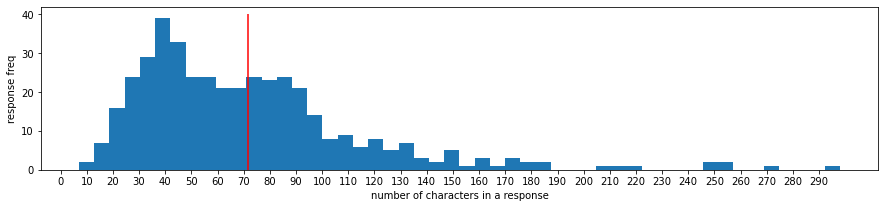

In [9]:
plt.figure(figsize=(15,3))
plt.hist(resp_len,bins=50)
plt.xticks(np.arange(0,300,10))
plt.xlabel('number of characters in a response')
plt.ylabel('response freq')
plt.vlines(resp_len.mean(),0,40, color = 'r')

In [10]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
pd.options.mode.chained_assignment = None  # default='warn'
import nltk
from nltk.corpus import stopwords

stopwords = set(STOPWORDS)
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice',
    'moving','moved']
#stopwords.update(["br", "href", "a", "an", "the"] + excluded_words_list)

## Word clouds

In [11]:
out_loc = '../../results/text_analysis/subtlety/no_cover_story/'

In [12]:
param_name

'subtlety'

subtlety 180
subtlety 150
subtlety 120
subtlety 90
subtlety 60
subtlety 30
subtlety 0


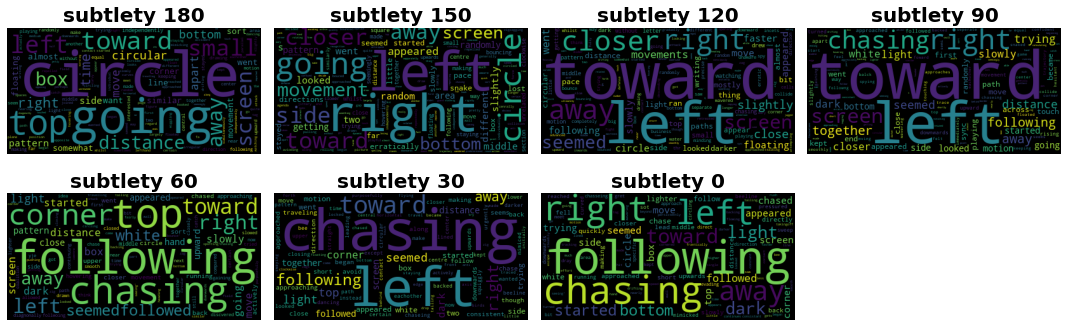

In [33]:
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows = nrows, ncols = ncols,figsize=(15,5))
# plt.suptitle(param_name, fontsize = 40,fontweight='bold')

for i,subt in enumerate(np.unique(df[param_name])[::-1]):
    r = int(np.floor(i/ncols))
    c = i%ncols
    ax = axs[r,c]
    print(param_name, subt)
    rows = df.loc[:,param_name] == subt
    df_subt = df.loc[rows,:]
    
    nchar = np.array([ len(i) for ind,i in enumerate(df_subt['responses']) ])
    txt = ' '.join(df_subt['responses']) # one long string
    txt = txt.lower()
    for words in excluded_words_list:
       txt = txt.replace(words,'')

    wordcloud2 = WordCloud(random_state=1).generate(txt)
    # Generate plot
    ax.imshow(wordcloud2)
    ax.axis("off")
    #ax.set_title('Subtlety ' + str(subt) + '(n=' + str(len(nchar)-too_few_char) + '/ ' + str(len(nchar)) + ')')
    ax.set_title(f'{param_name} {subt}',fontsize=20,fontweight='bold')
    ax.set_aspect('equal')
    
axs[1,3].set_visible(False)

plt.tight_layout()
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.1)

plt.savefig(f'{out_loc}wordcloud.png')


In [15]:
color_plots = 'tab:blue' # or tab:red

In [16]:
s=12 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [28]:
ref_words = ['follow','chase','wander','move','independent']
# ref_words = ['chase','moveInd','wander','move','independent']

words = df['responses']
df['follow_bool'] = [1 if ('follow' in i)|('following' in i) else 0 for i in words ]
df['chase_bool'] =  [1 if ('chase' in i) |('chasing'   in i) else 0 for i in words ]
df['wander_bool'] = [1 if ('wander' in i)|('hitting' in i) else 0 for i in words ]
df['move_bool'] = [1 if ('move' in i)|('moving' in i) else 0 for i in words ]
df['independent_bool'] = [1 if ('independent' in i)|('independently' in i) else 0 for i in words ]
# df['moveInd_bool'] = [1 if ('move independent' in i)|('moving independently' in i) |('moved independently' in i)|('independent motion' in i) else 0 for i in words ]
# df['chase_moveInd_bool'] = df['chase_bool'] - df['moveInd_bool']

In [29]:
inds = [[0,0],[0,1],[1,0],[1,1],[1,2]]
words_pos_dict = dict(zip(ref_words,inds))
words_pos_dict

{'follow': [0, 0],
 'chase': [0, 1],
 'wander': [1, 0],
 'move': [1, 1],
 'independent': [1, 2]}

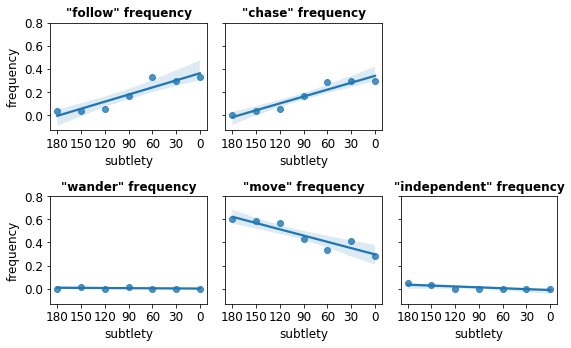

In [32]:
nrows,ncols = 2,3
fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (8,5), sharey = True)

for i,word in enumerate(ref_words):
    r,c = words_pos_dict[word]
    ax = axs[r,c]
    sns.regplot(data=df.groupby([param_name]).mean().reset_index(),x = param_name,y = word + '_bool',\
        ax=ax,marker = 'o', color = color_plots)
    ax.set_xticks(np.unique(df[param_name]))
    ax.set_title(f'"{word}" frequency', fontweight = 'bold')
    if c ==0:
        ax.set_ylabel('frequency')
    else:
        ax.set_ylabel('')
    ax.invert_xaxis()
    ax.set_yticks([0,0.2,0.4,0.6,0.8])

axs[0,2].axis('off')

plt.tight_layout()
plt.savefig(f'{out_loc}word_frequency.png',dpi=300,bbox_inches ='tight')

In [86]:
from pymer4.models import Lmer
from pymer4.stats import vif
from scipy.stats import zscore

In [87]:
# df['subtlety'] = 180-df['subtlety']
# df['subtlety'] = df['subtlety']/180
df['subtlety'] = zscore(df['subtlety'])

In [88]:
ref_words

['follow', 'chase', 'wander', 'move', 'independent']

In [89]:
word = ref_words[0]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)+ (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: follow_bool~subtlety+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: -166.073 	 AIC: 340.146

Random effects:

              Name    Var    Std
movie  (Intercept)  0.222  0.471
subID  (Intercept)  1.556  1.247

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.339,-2.997,-1.680,0.336,0.096,0.050,0.186,0.088,0.048,0.157,-6.964,0.0,***
subtlety,1.191,0.776,1.606,0.212,3.289,2.172,4.981,0.767,0.685,0.833,5.625,0.0,***


In [91]:
word = ref_words[1]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)+ (1|movie)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: chase_bool~subtlety+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: -133.288 	 AIC: 274.576

Random effects:

              Name    Var    Std
movie  (Intercept)  0.000  0.000
subID  (Intercept)  6.867  2.621

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-3.725,-5.006,-2.445,0.653,0.024,0.007,0.087,0.024,0.007,0.080,-5.702,0.0,***
subtlety,1.670,1.153,2.187,0.264,5.311,3.167,8.905,0.842,0.760,0.899,6.332,0.0,***


In [92]:
word = ref_words[1]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: chase_bool~subtlety+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: -133.288 	 AIC: 272.576

Random effects:

              Name    Var    Std
subID  (Intercept)  6.867  2.621

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-3.725,-5.006,-2.445,0.653,0.024,0.007,0.087,0.024,0.007,0.080,-5.702,0.0,***
subtlety,1.670,1.153,2.187,0.264,5.311,3.167,8.905,0.842,0.760,0.899,6.332,0.0,***


In [93]:
word = ref_words[2]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID) + (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: wander_bool~subtlety+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: -12.431 	 AIC: 32.863

Random effects:

              Name  Var  Std
movie  (Intercept)  0.0  0.0
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-5.478,-7.059,-3.898,0.806,0.004,0.001,0.020,0.004,0.001,0.020,-6.794,0.000,***
subtlety,-0.531,-2.041,0.979,0.771,0.588,0.130,2.662,0.370,0.115,0.727,-0.689,0.491,


In [94]:
word = ref_words[2]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: wander_bool~subtlety+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: -12.431 	 AIC: 30.863

Random effects:

              Name  Var  Std
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-5.478,-7.059,-3.898,0.806,0.004,0.001,0.020,0.004,0.001,0.020,-6.794,0.000,***
subtlety,-0.531,-2.041,0.979,0.771,0.588,0.130,2.662,0.370,0.115,0.727,-0.689,0.491,


In [95]:
word = ref_words[3]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)+ (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: move_bool~subtlety+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: -240.485 	 AIC: 488.971

Random effects:

              Name    Var    Std
movie  (Intercept)  0.000  0.000
subID  (Intercept)  3.093  1.759

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-0.253,-0.255,-0.250,0.001,0.777,0.775,0.778,0.437,0.437,0.438,-212.086,0.0,***
subtlety,-0.698,-0.701,-0.696,0.001,0.497,0.496,0.499,0.332,0.332,0.333,-585.358,0.0,***


In [96]:
word = ref_words[3]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

[1] "Model failed to converge with max|grad| = 0.0593352 (tol = 0.002, component 1)"
[2] " \n"                                                                           

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

Formula: move_bool~subtlety+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: -240.485 	 AIC: 486.971

Random effects:

              Name    Var    Std
subID  (Intercept)  3.094  1.759

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-0.253,-0.255,-0.250,0.001,0.777,0.775,0.778,0.437,0.437,0.438,-212.147,0.0,***
subtlety,-0.698,-0.701,-0.696,0.001,0.497,0.496,0.499,0.332,0.332,0.333,-585.355,0.0,***


In [97]:
word = ref_words[4]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID) + (1|movie)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: independent_bool~subtlety+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'movie': 84.0, 'subID': 60.0}

Log-likelihood: -21.494 	 AIC: 50.988

Random effects:

              Name  Var  Std
movie  (Intercept)  0.0  0.0
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-6.597,-9.817,-3.376,1.643,0.001,0.000,0.034,0.001,0.000,0.033,-4.015,0.000,***
subtlety,-2.555,-4.948,-0.163,1.221,0.078,0.007,0.850,0.072,0.007,0.459,-2.093,0.036,*


In [98]:
word = ref_words[4]
model = Lmer(f'{word}_bool ~ subtlety +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: independent_bool~subtlety+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 420	 Groups: {'subID': 60.0}

Log-likelihood: -21.494 	 AIC: 48.988

Random effects:

              Name  Var  Std
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-6.597,-9.817,-3.376,1.643,0.001,0.000,0.034,0.001,0.000,0.033,-4.015,0.000,***
subtlety,-2.555,-4.948,-0.163,1.221,0.078,0.007,0.850,0.072,0.007,0.459,-2.093,0.036,*
